In [2]:
#importing all the libraries
import warnings;
#disable warnings
warnings.simplefilter('ignore')

import os
os.environ["KERAS_BACKEND"] = "tensorflow"

#set image data format to channels_last
from tensorflow.keras.backend import set_image_data_format
set_image_data_format('channels_last')

import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#from keras.utils import np_utils
#from tensorflow.keras.utils import np_utils

#np_utils no longer exists in this package
#replace with to_categorical, should be equivalent
from tensorflow.keras.utils import to_categorical


In [3]:
#read in the data
data = r'C:\Users\vbque\OneDrive\Desktop\Machine Learning\Assignment6\Assignment 6\dataset'

#data generators
batch_size = 32
img_height, img_width = 28, 28

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#train
train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 60 images belonging to 2 classes.


In [4]:
#validate
validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 14 images belonging to 2 classes.


In [5]:
#make CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#model.add(Dense(128, activation='relu')) 
#model.add(Dropout(0.5)) 
#model.add(Dense(10, activation='softmax'))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  #2 classes: covid and normal

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 64)                589888    
                                                      

In [6]:
#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
#train the model
epochs = 10

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator))

Epoch 1/10


2/2 [==============================] - 2s 707ms/step - loss: 0.6550 - accuracy: 0.5167 - val_loss: 0.8210 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 431ms/step - loss: 0.6739 - accuracy: 0.5333 - val_loss: 0.6068 - val_accuracy: 0.5714
Epoch 3/10
2/2 [==============================] - 1s 408ms/step - loss: 0.5011 - accuracy: 0.8167 - val_loss: 0.5707 - val_accuracy: 0.5714
Epoch 4/10
2/2 [==============================] - 1s 485ms/step - loss: 0.4277 - accuracy: 0.8833 - val_loss: 0.5167 - val_accuracy: 0.7857
Epoch 5/10
2/2 [==============================] - 1s 505ms/step - loss: 0.2941 - accuracy: 0.9667 - val_loss: 0.4703 - val_accuracy: 0.7857
Epoch 6/10
2/2 [==============================] - 1s 391ms/step - loss: 0.2173 - accuracy: 0.9833 - val_loss: 0.4446 - val_accuracy: 0.7857
Epoch 7/10
2/2 [==============================] - 1s 543ms/step - loss: 0.1409 - accuracy: 0.9667 - val_loss: 0.4155 - val_accuracy: 0.8571
Epoch 8/10
2/2 [==

In [8]:
#model evaluation
score = model.evaluate(validation_generator, verbose=1)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

#test accuracy is 92.86%

1/1 [==============================] - 0s 161ms/step - loss: 0.4794 - accuracy: 0.9286
Test loss: 0.4794378876686096, Test accuracy: 0.9285714030265808


In [9]:
#test set predictions
y_hat = model.predict(validation_generator)

1/1 [==============================] - 0s 199ms/step


In [ ]:
#!pip install opencv-python


1/1 [==============================] - 0s 15ms/step


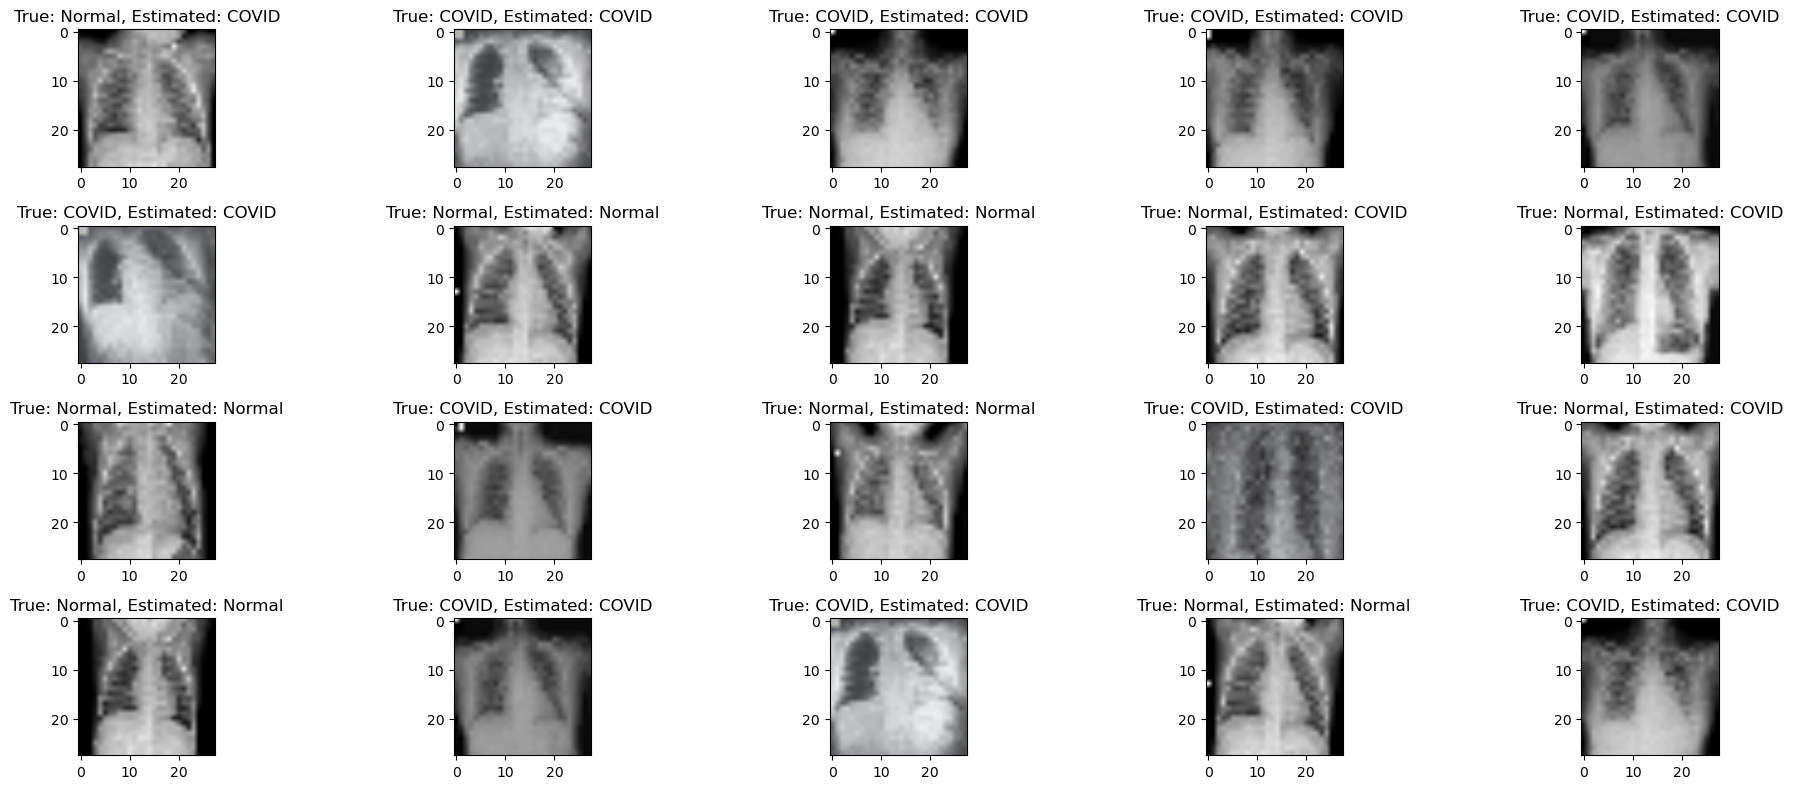

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))  #increase the figure size for better visualization
j = 1
max_plots = 20  #20 images to be predicted
break_outer_loop = False
class_labels = {0: 'COVID', 1: 'Normal'}  #0 is COVID and 1 is Normal

for batch in validation_generator:
    images, labels = batch

    y_hat = model.predict(images)

    for i in range(len(y_hat)):
        threshold1 = y_hat[i] < 0.1
        y_hat[i][threshold1] = 0
        threshold2 = y_hat[i] > 0.9
        y_hat[i][threshold2] = 1
        y_hat[i] = y_hat[i].astype(int)

        estimated = np.argmax(y_hat[i])
        true = np.argmax(labels[i])

        plt.subplot(4, 5, j)  #4 rows, 5 images per row, 20 pics total
        title = f'True: {class_labels[true]}, Estimated: {class_labels[estimated]}'
        plt.imshow(images[i], interpolation='bilinear') #makes images clearer
        plt.title(title)

        if estimated == true:
            correct_predictions += 1

        j += 1
        if j > max_plots:
            break_outer_loop = True
            break

    if break_outer_loop:
        break

plt.tight_layout()
plt.show()


# We can see in the 20 images in the output above (different each run), the classification under True: Normal or True: COVID shows the true classification of the images (which folder they come from). The Estimated: Normal or Estimated: COVID shows what the classification model predicted them to be.

# The calculation of accuracy in one of the earlier chunks shows that the test accuracy is 92.86%. 

# False negatives occur as True: COVID, Estimated: Normal
# False positives occur as True: Normal, Estimated: COVID

# I ran the model a few times to get various outcomes in classification predictions. In some of the runs, there were a couple false negatives or positives (~86% accurate), but some runs had 100% correct predictions (20/20).

# Ultimately, the overall accuracy of 92.86% is good, and could potentially be increase by further normalizing the data, or having a larger dataset to train and test the model on. 